## Introduction
###### In the highly competitive tour and travel industry, customer retention is crucial for maintaining profitability and growth. The Tour & Travels Customer Churn Prediction dataset provides valuable information to help a travel company predict which customers are likely to churn, thereby enabling targeted retention strategies. This dataset includes various features such as age, frequent flyer status, annual income class, services opted frequency, social media account synchronization, and hotel bookings. By building predictive models, we can identify at-risk customers and take proactive measures to retain them, ultimately saving company resources and improving customer satisfaction.

###### In this tutorial, we will perform exploratory data analysis (EDA) and build a predictive model to identify potential churners. The binary target variable indicates whether a customer has churned (1) or not (0). Let's dive into the code to start the analysis and model building.

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing 
from sklearn.preprocessing import StandardScaler, LabelEncoder

# models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier 

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
warnings.simplefilter('ignore')

In [8]:
data = pd.read_csv('Customertravel.csv')
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [9]:
data.shape

(954, 7)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [10]:
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [13]:
# rename churn column for clarity
data.rename(columns={'Target': 'Churn'}, inplace=True)

In [14]:
data.groupby('Churn').describe()

Age                                                    ServicesOpted  \
       count       mean       std   min   25%   50%   75%   max         count   
Churn                                                                           
0      730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0         730.0   
1      224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0         224.0   

                                                    
           mean       std  min  25%  50%  75%  max  
Churn                                               
0      2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1      2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

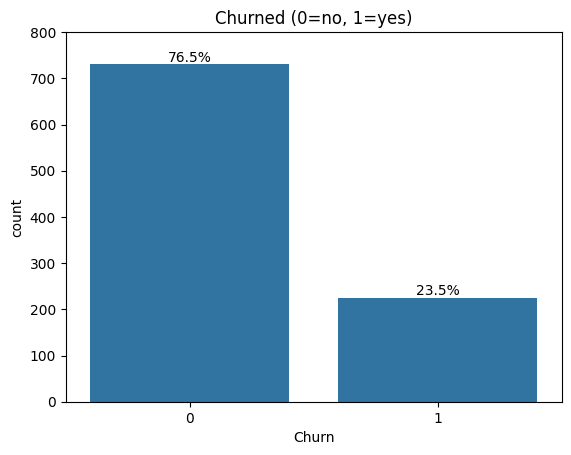

In [17]:
ax = sns.countplot(data=data, x='Churn')
percentage = data['Churn'].value_counts(normalize=True).values * 100
lbls = [f'{p:.1f}%' for p in percentage]

ax.bar_label(container=ax.containers[0], labels=lbls)   
plt.ylim(top=800)
plt.title('Churned (0=no, 1=yes)');

In [19]:
100*data['Churn'].value_counts()/len(data['Churn'])

Churn
0    76.519916
1    23.480084
Name: count, dtype: float64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

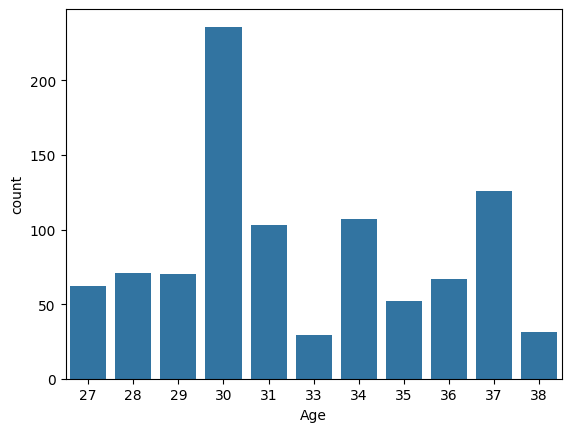

In [21]:
sns.countplot(data = data, x = 'Age')
plt.show()

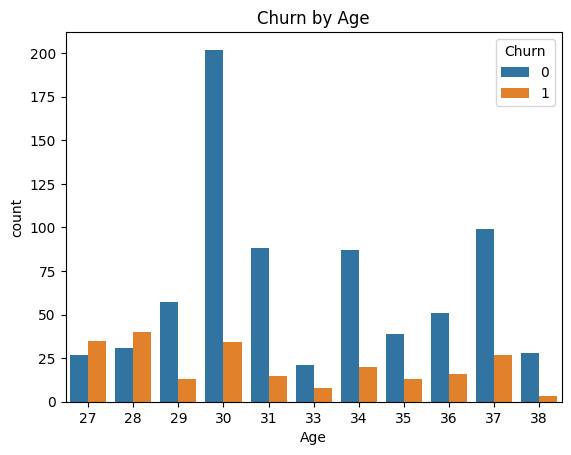

In [23]:
sns.countplot(data=data, x='Age', hue='Churn').set_title('Churn by Age');

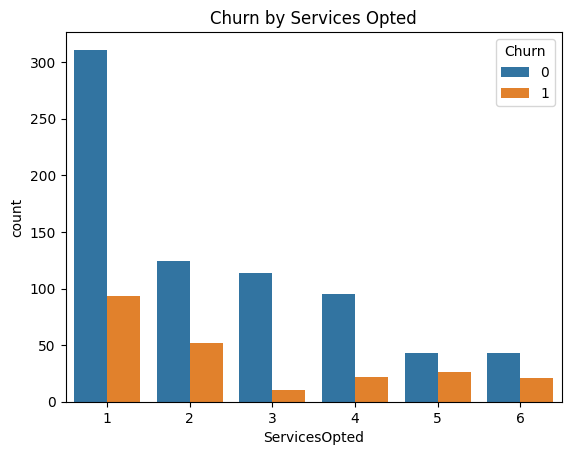

In [24]:
sns.countplot(data=data, x='ServicesOpted', hue='Churn').set_title('Churn by Services Opted');

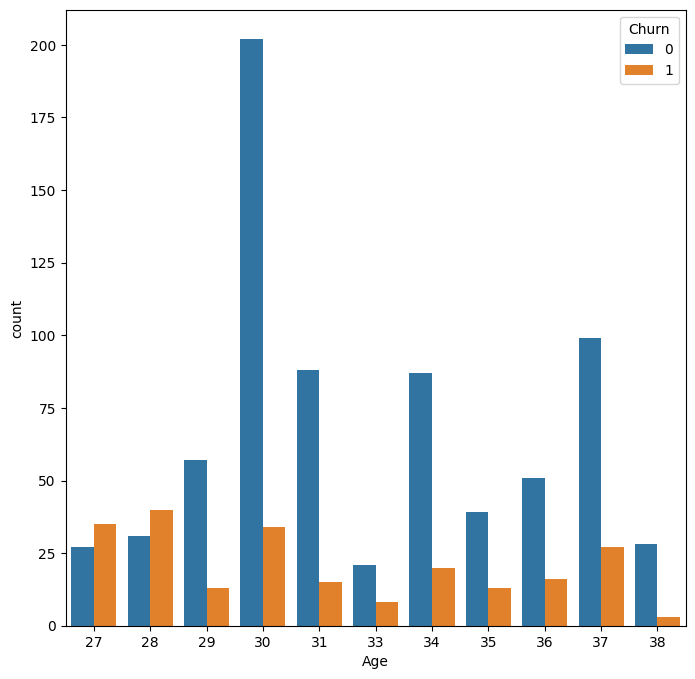

In [27]:
# plotting the countplot Age Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='Age',hue='Churn',data = data)
plt.show()

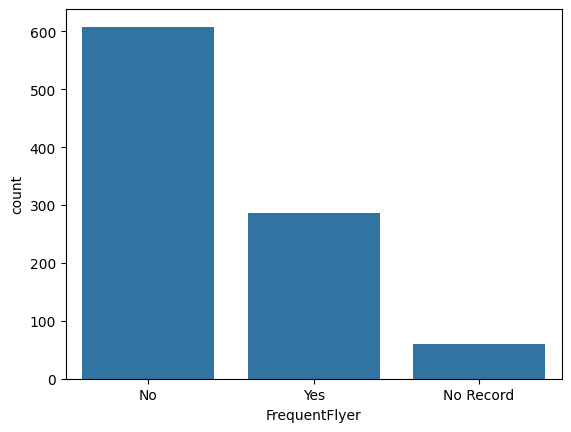

In [28]:
sns.countplot(data = data, x = 'FrequentFlyer')
plt.show()

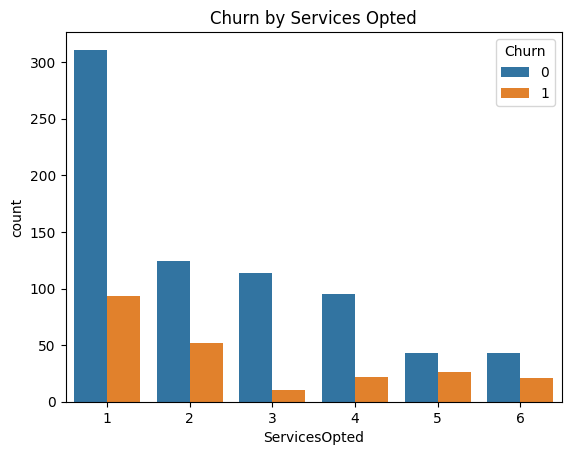

In [30]:
sns.countplot(data=data, x='ServicesOpted', hue='Churn').set_title('Churn by Services Opted');

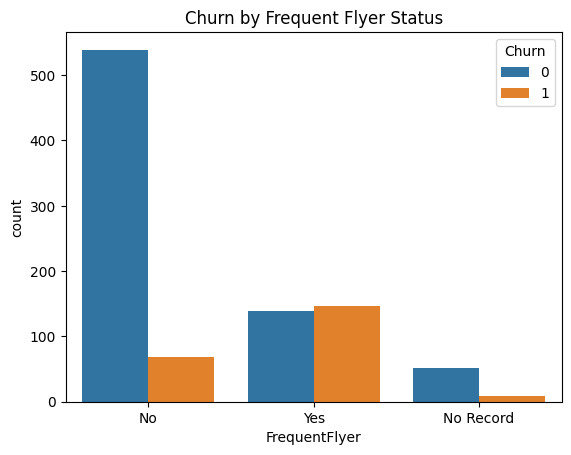

In [32]:
sns.countplot(data=data, x='FrequentFlyer', hue='Churn').set_title('Churn by Frequent Flyer Status');

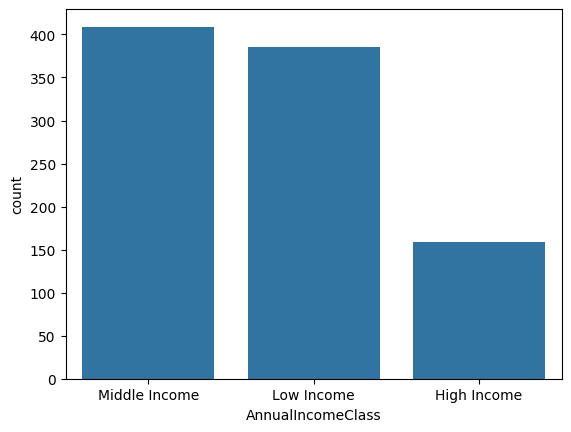

In [33]:
sns.countplot(data = data, x = 'AnnualIncomeClass')
plt.show()

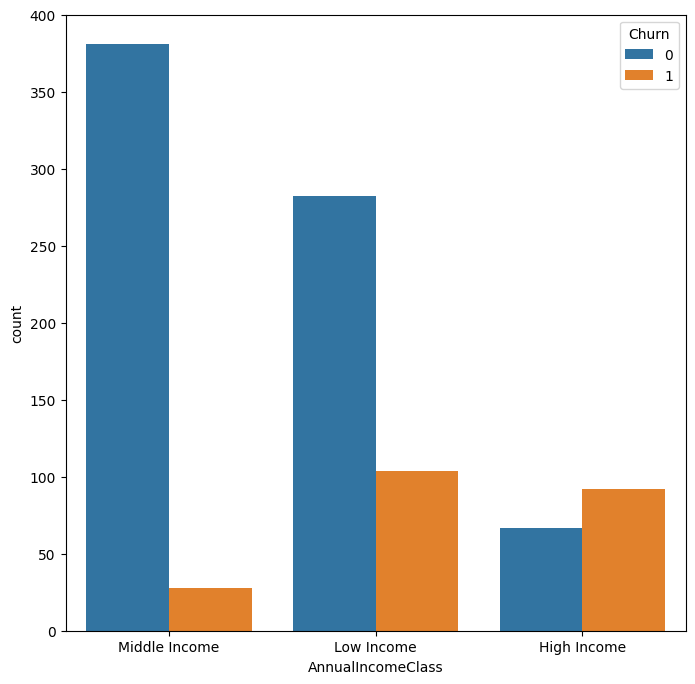

In [34]:
# plotting the countplot Accountsyncedtosocialmedia Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='AnnualIncomeClass',hue='Churn',data=data)
plt.show()

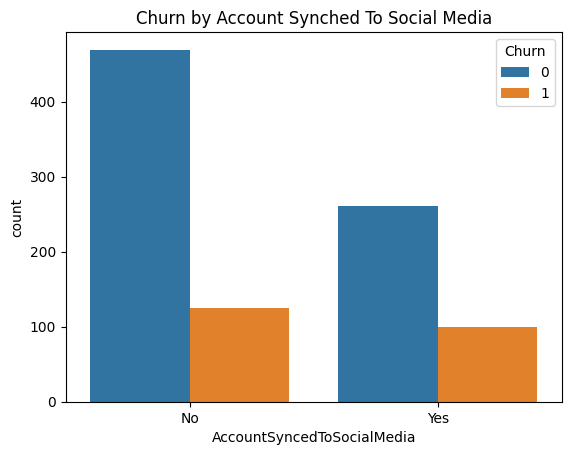

In [35]:
sns.countplot(data=data, x='AccountSyncedToSocialMedia', hue='Churn').set_title('Churn by Account Synched To Social Media');

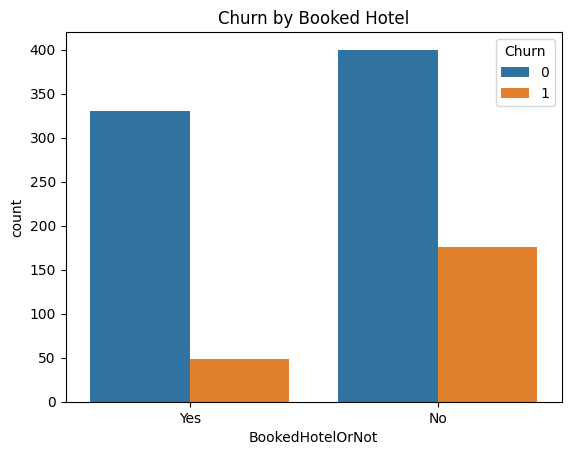

In [37]:
sns.countplot(data=data, x='BookedHotelOrNot', hue='Churn').set_title('Churn by Booked Hotel'); 

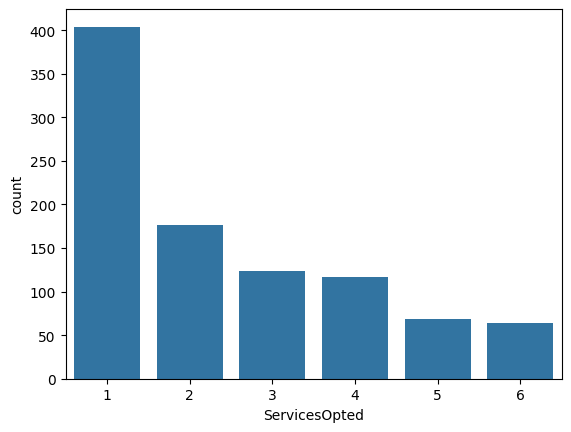

In [38]:
sns.countplot(data = data, x = 'ServicesOpted')
plt.show()

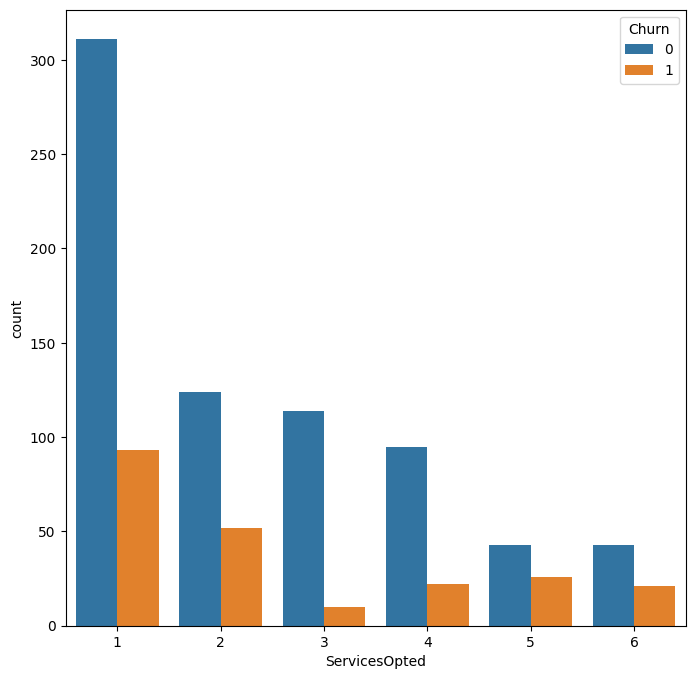

In [39]:
# plotting the countplot Serviesopted Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='ServicesOpted',hue='Churn',data=data)
plt.show()

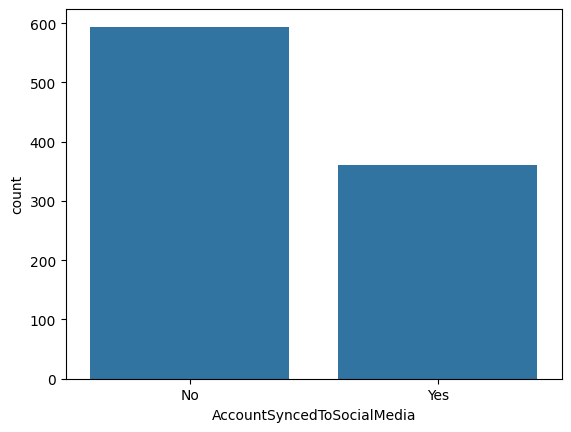

In [40]:
sns.countplot(data = data, x = 'AccountSyncedToSocialMedia')
plt.show()

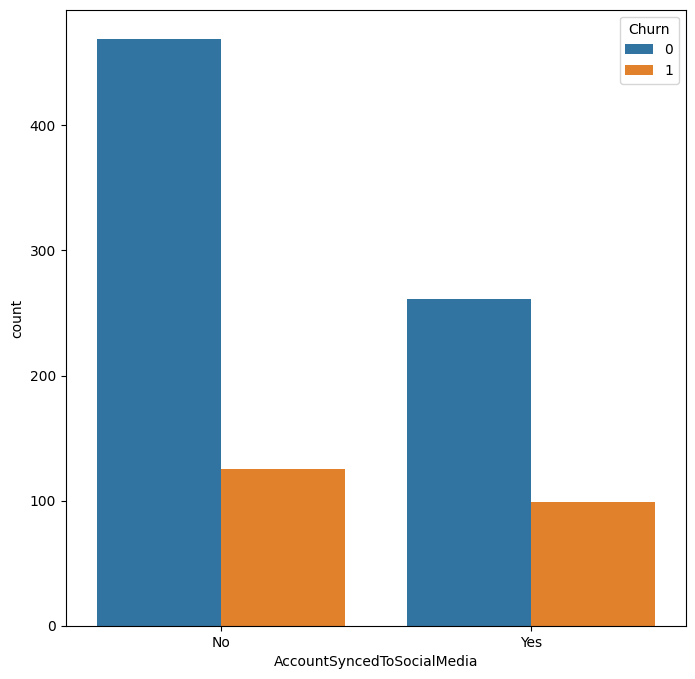

In [41]:
# plotting the countplot Accountsyncedtosocialmedia Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='AccountSyncedToSocialMedia',hue='Churn',data=data)
plt.show()

### Data Pre-Processing

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [44]:
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Churn                         0
dtype: int64

In [45]:
# create copy for encoding
data_coded = data.copy()

In [46]:
# Label Encoding ordinal features for services 
ordinals = ['ServicesOpted']
data_coded[ordinals] = data_coded[ordinals].apply(LabelEncoder().fit_transform)

In [47]:
# manually adapt scaling for Annual Income Class as we need to implement the ordinal scale in order to get correct scaling
data_coded = data_coded.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})

In [48]:
# One-Hot Encoding non-ordinal features
dummies = ['BookedHotelOrNot', 'AccountSyncedToSocialMedia', 'FrequentFlyer']
data_coded = pd.get_dummies(data_coded, columns = dummies, drop_first=True)

In [50]:
#rename some cols for clarity
data_coded.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)

In [51]:
data_coded.head(6)

,Age,AnnualIncomeClass,ServicesOpted,Churn,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
0,34,1,5,0,True,False,False,False
1,34,0,4,1,False,True,False,True
2,37,1,2,0,False,True,False,False
3,30,1,1,0,False,False,False,False
4,30,0,0,0,False,False,False,False
5,27,2,0,1,True,False,False,True


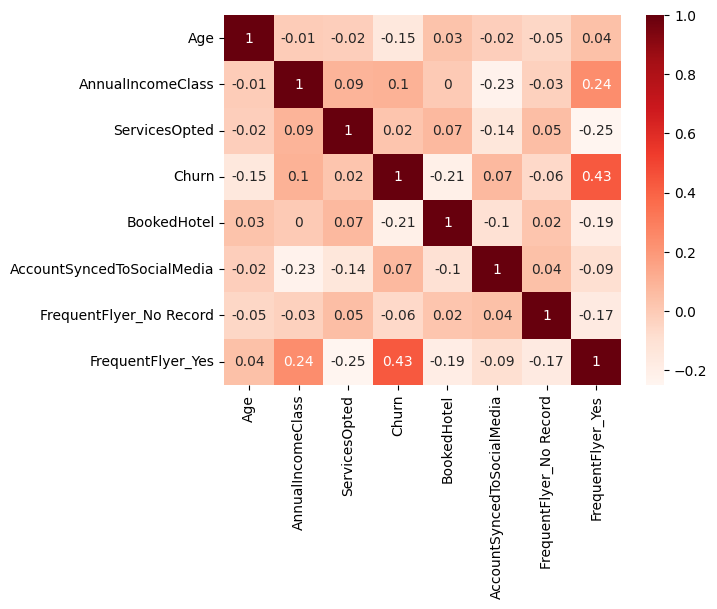

In [53]:
sns.heatmap(np.round(data_coded.corr(method ='spearman'), 2), annot=True,  cmap='Reds');

In [55]:
X = data_coded.drop(columns='Churn', axis=1)
y = data_coded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
# Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)
    # make predictions for test data
    y_pred = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       240
           1       0.65      0.37      0.47        75

    accuracy                           0.80       315
   macro avg       0.74      0.66      0.68       315
weighted avg       0.79      0.80      0.78       315


Confusion Matrix: 



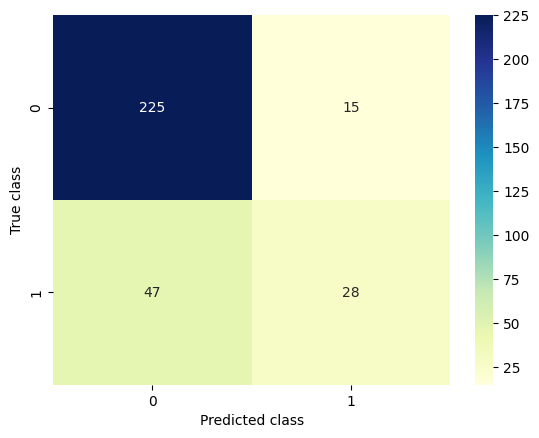

In [60]:
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       240
           1       0.50      0.76      0.60        75

    accuracy                           0.76       315
   macro avg       0.70      0.76      0.71       315
weighted avg       0.81      0.76      0.77       315


Confusion Matrix: 



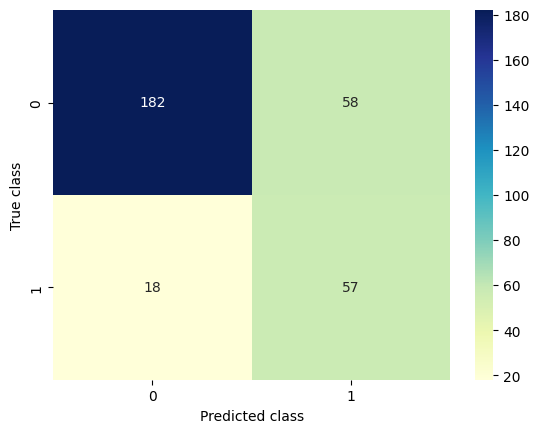

In [61]:
modelLR = LogisticRegression(class_weight='balanced')
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       240
           1       0.78      0.67      0.72        75

    accuracy                           0.88       315
   macro avg       0.84      0.80      0.82       315
weighted avg       0.87      0.88      0.87       315


Confusion Matrix: 



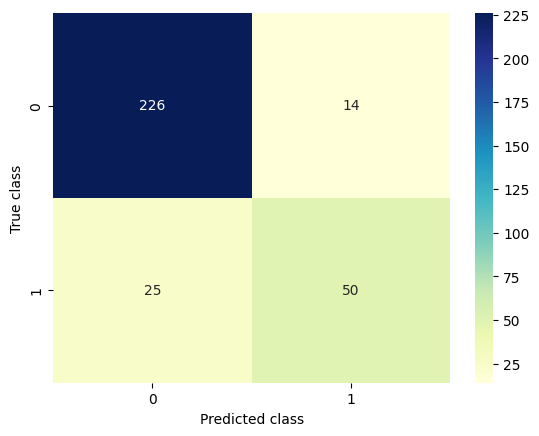

In [62]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

* Balanced Bagging Classifier * 

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       240
           1       0.68      0.89      0.77        75

    accuracy                           0.88       315
   macro avg       0.82      0.88      0.84       315
weighted avg       0.90      0.88      0.88       315


Confusion Matrix: 



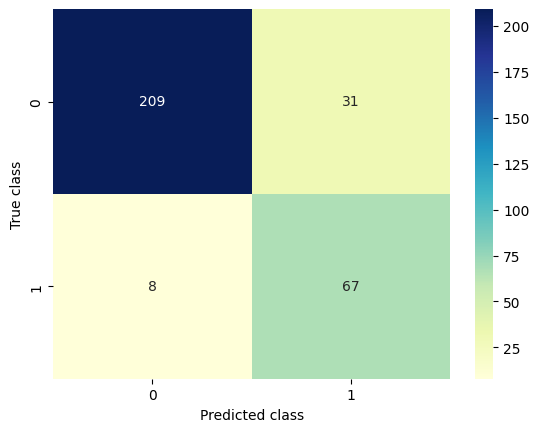

In [63]:
modelBBC = BalancedBaggingClassifier()
print('* Balanced Bagging Classifier * \n')
fit_evaluate(modelBBC, X_train, X_test, y_train, y_test)

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       240
           1       0.85      0.63      0.72        75

    accuracy                           0.89       315
   macro avg       0.87      0.80      0.83       315
weighted avg       0.88      0.89      0.88       315


Confusion Matrix: 



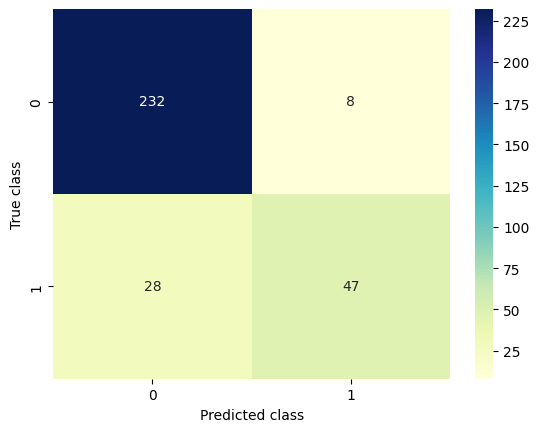

In [64]:
modelKNN = KNeighborsClassifier() 
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

Minimum error: 0.114 at K = 5 



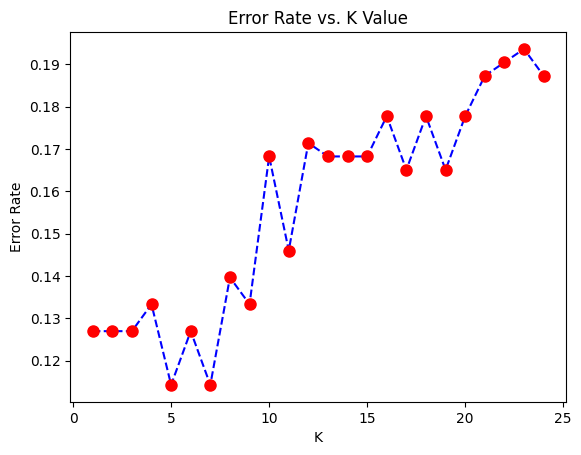

In [65]:
# finding the best k 
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,25), error_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markeredgecolor='r', markersize=8)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')

# plotting the k value that minimizes the error 
print('Minimum error:', np.round(min(error_rate), 3),'at K =', (error_rate.index(min(error_rate)) + 1), '\n');

In [66]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [67]:
data['FrequentFlyer'].value_counts()

FrequentFlyer
No           608
Yes          286
No Record     60
Name: count, dtype: int64

In [68]:
# Here we cannot use Label Encoder, so we use pd.get_dummies method
data['AnnualIncomeClass'].value_counts()

AnnualIncomeClass
Middle Income    409
Low Income       386
High Income      159
Name: count, dtype: int64

In [69]:
# Here we cannot use Label Encoder, so we use pd.get_dummies method
data['AccountSyncedToSocialMedia'].value_counts()

AccountSyncedToSocialMedia
No     594
Yes    360
Name: count, dtype: int64

In [70]:
# Here, we can use Label Encoder, Because we have two variables.
data['AccountSyncedToSocialMedia'] = lb.fit_transform(data['AccountSyncedToSocialMedia'])
data['AccountSyncedToSocialMedia'].value_counts()

AccountSyncedToSocialMedia
0    594
1    360
Name: count, dtype: int64

In [71]:
data['BookedHotelOrNot'].value_counts()

BookedHotelOrNot
No     576
Yes    378
Name: count, dtype: int64

In [72]:
# Here, we can use Label Encoder, Because we have two variables.
data['BookedHotelOrNot'] = lb.fit_transform(data['BookedHotelOrNot'])
data['BookedHotelOrNot'].value_counts()

BookedHotelOrNot
0    576
1    378
Name: count, dtype: int64

In [73]:
data = pd.get_dummies(data, columns = ['FrequentFlyer','AnnualIncomeClass'])
data.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,0,True,False,False,False,False,True
1,34,5,1,0,1,False,False,True,False,True,False
2,37,3,1,0,0,True,False,False,False,False,True
3,30,2,0,0,0,True,False,False,False,False,True
4,30,1,0,0,0,True,False,False,False,True,False


In [74]:
data.isnull().sum()

Age                                0
ServicesOpted                      0
AccountSyncedToSocialMedia         0
BookedHotelOrNot                   0
Churn                              0
FrequentFlyer_No                   0
FrequentFlyer_No Record            0
FrequentFlyer_Yes                  0
AnnualIncomeClass_High Income      0
AnnualIncomeClass_Low Income       0
AnnualIncomeClass_Middle Income    0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int64
 1   ServicesOpted                    954 non-null    int64
 2   AccountSyncedToSocialMedia       954 non-null    int32
 3   BookedHotelOrNot                 954 non-null    int32
 4   Churn                            954 non-null    int64
 5   FrequentFlyer_No                 954 non-null    bool 
 6   FrequentFlyer_No Record          954 non-null    bool 
 7   FrequentFlyer_Yes                954 non-null    bool 
 8   AnnualIncomeClass_High Income    954 non-null    bool 
 9   AnnualIncomeClass_Low Income     954 non-null    bool 
 10  AnnualIncomeClass_Middle Income  954 non-null    bool 
dtypes: bool(6), int32(2), int64(3)
memory usage: 35.5 KB


<Axes: >

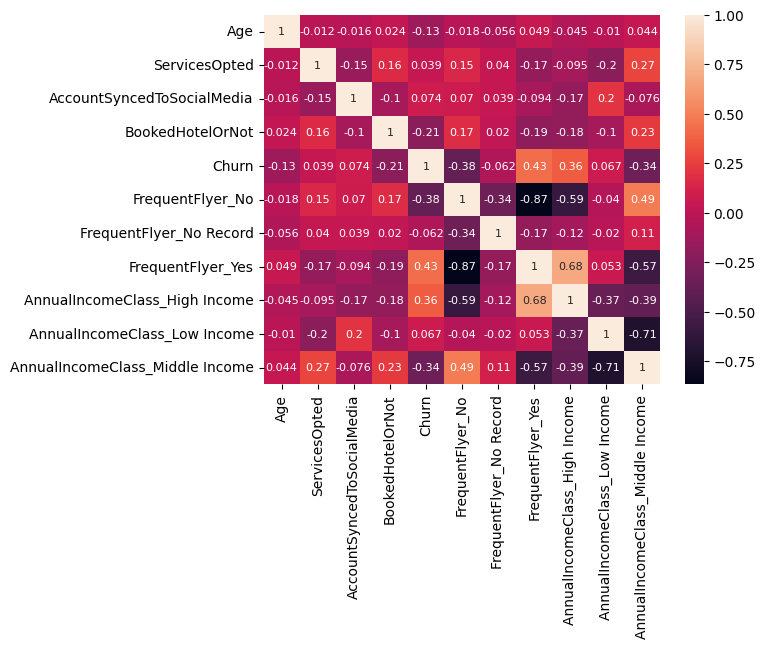

In [76]:
sns.heatmap(data.corr(), annot = True,annot_kws= {'fontsize':8})

In [77]:
# Dataset Looks Good, and ready for Model Building.

### Splitting the data

In [78]:
X = data.drop('Churn', axis = 1)
y = data['Churn']
X.columns

Index(['Age', 'ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'FrequentFlyer_No', 'FrequentFlyer_No Record',
       'FrequentFlyer_Yes', 'AnnualIncomeClass_High Income',
       'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income'],
      dtype='object')

In [79]:
X.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,True,False,False,False,False,True
1,34,5,1,0,False,False,True,False,True,False
2,37,3,1,0,True,False,False,False,False,True
3,30,2,0,0,True,False,False,False,False,True
4,30,1,0,0,True,False,False,False,True,False


In [80]:
X.shape

(954, 10)

In [81]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int64

In [82]:
y.shape

(954,)

In [83]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y, test_size= 0.2, random_state= 42)
X_train.shape

(763, 10)

In [84]:
X_test.shape

(191, 10)

In [85]:
y_train.shape

(763,)

In [86]:
y_test.shape

(191,)

### Model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_pred = lg.predict(X_test)
lg.score(X,y)

0.8218029350104822

In [89]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       153
           1       0.67      0.58      0.62        38

    accuracy                           0.86       191
   macro avg       0.78      0.75      0.77       191
weighted avg       0.85      0.86      0.85       191



In [90]:
print(confusion_matrix(y_test, y_pred))

[[142  11]
 [ 16  22]]


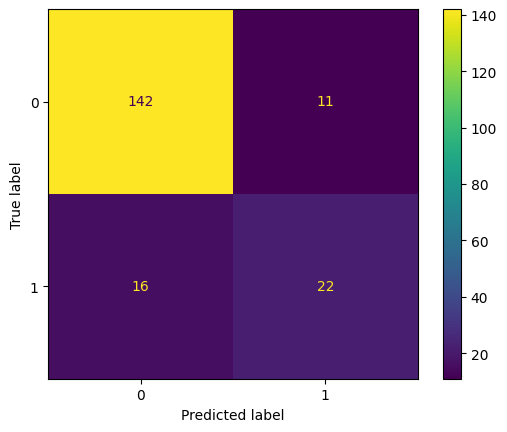

In [91]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [92]:
# Why our model is working Well ? the answer is The data is imbalanced, so lets make it balanced by using techniques called oversampling and undersampling.

In [93]:
# In this is problem Our dataset is low, so we can use the Oversampling method to deal with the imbalace data.
from imblearn.combine import SMOTEENN 
sm = SMOTEENN() # using SMOTE.

In [94]:
from imblearn.combine import SMOTEENN 
sm = SMOTEENN() # using SMOTE.
Xs, ys = sm.fit_resample(X,y)
Xs_train, Xs_test, ys_train,ys_test = tts(Xs,ys,test_size= 0.2, random_state= 42)
Xs_train.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
726,34,1,1,0,False,False,True,True,False,False
256,37,1,0,0,True,False,False,False,True,False
290,30,1,1,1,True,False,False,False,True,False
292,36,3,1,0,True,False,False,False,False,True
2,30,2,0,0,True,False,False,False,False,True


In [95]:
Xs_train.shape

(881, 10)

In [96]:
Xs_test.shape

(221, 10)

In [97]:
ys_train.head()

726    1
256    0
290    0
292    0
2      0
Name: Churn, dtype: int64

In [98]:
ys_train.shape

(881,)

In [99]:
# Model
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression()
lgs.fit(Xs_train, ys_train)

LogisticRegression()

In [100]:
ys_pred1 = lgs.predict(Xs_test)
lgs.score(Xs_test,ys_pred1)

1.0

In [101]:
print(classification_report(ys_test, ys_pred1))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       125
           1       0.83      0.89      0.85        96

    accuracy                           0.87       221
   macro avg       0.87      0.87      0.87       221
weighted avg       0.87      0.87      0.87       221



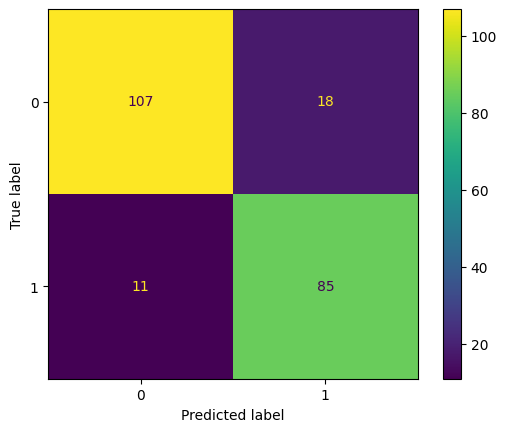

In [102]:
confusion_matrix = metrics.confusion_matrix(ys_test, ys_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [103]:
# Still Our Model is not Performing Better lets see another models.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 42 ,max_depth= 7, min_samples_leaf=8)
dtc.fit(Xs_train,ys_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, random_state=42)

In [104]:
ys_pred2 = dtc.predict(Xs_test)
dtc.score(Xs_test,ys_pred2)

1.0

In [105]:
print(classification_report(ys_test, ys_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       125
           1       0.96      0.97      0.96        96

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



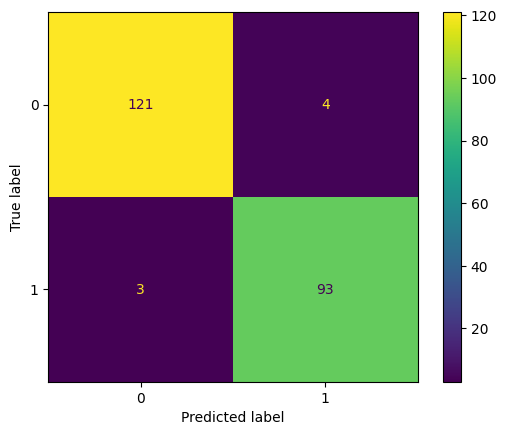

In [106]:
confusion_matrix = metrics.confusion_matrix(ys_test, ys_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

##### Our model is performing Very Well Having precision - 96, Recall - 94 and Accuracy - 96 

### Saving the Model.

In [108]:
import pickle
pickle.dump(lgs, open('churn_predictor.pkl', 'wb'))